<a href="https://colab.research.google.com/github/vs-gorgan/practicum.yandex/blob/main/review_homework_id_556652_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:#bdc3c7; padding: 20px"> <h7 style="color:black; margin-bottom:20px"> 

Николай, привет!) Я Михаил Егошин, мидл-ревьюер по специализации проекта - "Как рассказать историю с помощью данных". 

Моя цель: отметить те моменты, которые не были подсвечены на предыдущем ревью, чтобы у тебя было полное понимание, на какие нюансы стоило обратить внимание.
    
    
---    
<div class="alert alert-block alert-danger">
❌ : Критическое замечание. Тебе нужно будет учесть их и внести корректировки в свою работу.
</div> 
    
---
<div class="alert alert-block alert-warning">
⚠️ : Замечание\совет на будущее.
</div>

---
    
<div class="alert alert-block alert-success">
✔️ : Когда всё сделано правильно.



</div>

# Описание проекта

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

Аналитику необходимо подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

Требуется сделать презентацию информативной и лаконичной. Её структура и оформление сильно влияют на восприятие информации читателями вашего исследования. Выбирать инструменты (matplotlib, seaborn и другие) и типы визуализаций вы можете самостоятельно.

Вам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

**Описание данных**

-    `name` — название заведения;
-    `address` — адрес заведения;
-    `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
-    `hours` — информация о днях и часах работы;
-    `lat` — широта географической точки, в которой находится заведение;
-    `lng` — долгота географической точки, в которой находится заведение;
-    `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
-    `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
-    `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:   
      -  «Средний счёт: 1000–1500 ₽»;    
      -  «Цена чашки капучино: 130–220 ₽»;    
      -  «Цена бокала пива: 400–600 ₽».   
        и так далее;
-    `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:   
      -  Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.   
      -  Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.   
      -  Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.   
-    `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
      -  Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
      -  Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
      -  Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
-    `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки);
-    `district` — административный район, в котором находится заведение, например Центральный административный округ;
-    `seats` — количество посадочных мест.

<hr style="border: 2px solid green;" />

## Загрузите данные и изучите общую информацию

### Загрузите данные и изучите общую информацию

In [170]:
# импортируем библиотеку обработки и анализа структурированных данных
import pandas as pd
pd.set_option('display.max_colwidth', None)

# импортируем библиотеку для визуализации данных двумерной и трёхмерной графикой
import matplotlib.pyplot as plt

# импортируем библиотеку для визуализации данных
import plotly.graph_objects as go
import plotly.express as px

# импортируем библиотеку математических вычислений
import numpy as np

# импортируем модуль для работы с датой и временем
import datetime as dt

# импортируем статистические функции
import scipy.stats as stats

# импортируем библиотеку для создания статистических графиков
import seaborn as sns

# импортируем библиотеку с математическими функциями
import math as mth

# импортируем модуль регулярных выражений
import re

# подключаем модуль для работы с JSON-форматом
import json

import requests

# импортируем карту, хороплет, и маркер
from folium import Map, Choropleth, Marker

# импортируем кластер
from folium.plugins import MarkerCluster

In [171]:
# зададим путь к файлу в качестве переменной
path = '/content/ya_data/moscow_places.csv'

# загрузим информацию в датафрейм
data = pd.read_csv(path, error_bad_lines=False, engine="python")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



Skipping line 3982: unexpected end of data


In [172]:
# проверим, требуются ли разделители
data.head(1)

name category                     address  \
0  WoWфли     кафе  Москва, улица Дыбенко, 7/1   

                          district                   hours        lat  \
0  Северный административный округ  ежедневно, 10:00–22:00  55.878494   

        lng  rating price avg_bill  middle_avg_bill  middle_coffee_cup  chain  \
0  37.47886     5.0   NaN      NaN              NaN                NaN      0   

   seats  
0    NaN

### Изучите общую информацию о датасете. Сколько заведений представлено? Что можно сказать о каждом столбце? Значения какого типа они хранят? 

In [173]:
# посмотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3980 non-null   object 
 1   category           3980 non-null   object 
 2   address            3980 non-null   object 
 3   district           3980 non-null   object 
 4   hours              3744 non-null   object 
 5   lat                3980 non-null   float64
 6   lng                3980 non-null   float64
 7   rating             3980 non-null   float64
 8   price              1595 non-null   object 
 9   avg_bill           1859 non-null   object 
 10  middle_avg_bill    1520 non-null   float64
 11  middle_coffee_cup  280 non-null    float64
 12  chain              3980 non-null   int64  
 13  seats              2340 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 435.4+ KB


Названия столбцов не требуют переименований.

На первый взгляд тип данных у столбцов установлен корректно.

Колонка `hours` (время работы), `price` (ценовая категория заведения), `avg_bill` (средний чек), `middle_coffee_cup` (цена чашки капучино) и `seats` (количество посадочных мест) содержат пропуски данных.

<hr style="border: 2px solid green;" />

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> ⬆ Комментарии от старшего ревьюера ✔️ : </b> 

Здесь всё хорошо. Данные выгружены корректно и представлено содержимое датасета. Можно идти дальше
   
</div>

## Выполните предобработку данных

Изучите, есть ли дубликаты в данных. Поищите пропуски: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?

In [174]:
# исследуем сведения о пропусках
# создадим датафрейм skip, который содержит число пропусков в каждой колонке
skip = pd.DataFrame(data.isna().sum()) \
    .rename(columns={0: 'skip'})

# добавим колонку с долей пропусков от общего числа строк
skip['part'] = skip['skip'] * 100 / len(data)

# установим формат - проценты
skip.style.format({'part': '{:.2f}%'})

Пять столбцов имеют существенное количество пропусков. Далее примем решение, на сколько для нас это критично и как можем их заполнить.

In [175]:
# подсчёт явных дубликатов
print('Количество дубликатов = ', data.duplicated().sum())

Количество дубликатов =  0


In [176]:
# выведем кол-во заведений
print('Количество заведений =', len(data.name.unique()))

Количество заведений = 2848


Для проверки на неявные дубликаты изучим данные в каждом столбце.

#### Столбец `name`

In [177]:
print('Кол-во уникальных имён =', len(data.name.unique()))

Кол-во уникальных имён = 2848


Число уникальных имён заведений меньше количиства объектов общественного питания. Однако, визуально оценить присутствие неявных дубликатов в имени трудозатратно. Приведём все названия к нижнему регистру.

In [178]:
data['name'] = data['name'].str.lower()

In [179]:
print('Кол-во уникальных имён после предобработки =', len(data.name.unique()))

Кол-во уникальных имён после предобработки = 2813


Ровно на 100 имён сократился список.

#### Столбец `address`

In [180]:
print('Кол-во уникальных адресов =', len(data.address.unique()))
data['address'] = data['address'].str.lower()
print('Кол-во уникальных имён после предобработки =', len(data.address.unique()))

Кол-во уникальных адресов = 2724
Кол-во уникальных имён после предобработки = 2723


Ну.... тоже результат ))

#### Столбец `hours`

In [181]:
print('Кол-во уникальных расписаний =', len(data.hours.unique()))
data['hours'] = data['hours'].str.lower()
print('Кол-во уникальных расписаний после предобработки =', len(data.hours.unique()))

Кол-во уникальных расписаний = 781
Кол-во уникальных расписаний после предобработки = 781


В расписании режима работы ни чего не изменилось.    
Остальные столбцы проверять нет смысла.

Подведём итоги.    
Ранее мы не выявили полных дубликатов срок. Посмотрим, как изменилась ситуация.

In [182]:
print('Количество дубликатов = ', data.duplicated().sum())

Количество дубликатов =  0


Дубликатов нет.
Вероятно, данные собирались из разных источников, поэтому наименования отличались. Однако задвоенной информации не было.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Проверены неявные дубликаты.</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ❌ : </b>
    
Очень хорошо, что ты решил уделить внимание ключевым колонкам. Это была грамотная идея привести к нижнему регистру.    
    
Но по факту, проверки на неявные дубликаты нет. При приведении данных к нижнему регистру есть неявные дубликаты на которые стоило посмотреть глазами (пример ниже) и постараться интерпретировать как они могли появится

</div>

In [183]:
# КОД РЕВЬЮЕРА

data[['name', 'address']].duplicated().sum()

4

In [184]:
# КОД РЕВЬЮЕРА

data[data[['name', 'address']].duplicated(keep=False)]

name  category  \
189                        кафе      кафе   
215                        кафе      кафе   
1430                  more poke  ресторан   
1511                  more poke  ресторан   
2211  раковарня клешни и хвосты  ресторан   
2420  раковарня клешни и хвосты   бар,паб   
3091            хлеб да выпечка  булочная   
3109            хлеб да выпечка      кафе   

                                      address  \
189              москва, парк ангарские пруды   
215              москва, парк ангарские пруды   
1430  москва, волоколамское шоссе, 11, стр. 2   
1511  москва, волоколамское шоссе, 11, стр. 2   
2211               москва, проспект мира, 118   
2420               москва, проспект мира, 118   
3091              москва, ярцевская улица, 19   
3109              москва, ярцевская улица, 19   

                                     district  \
189           Северный административный округ   
215           Северный административный округ   
1430          Северный административный округ   
1511          Северный административный округ   
2211  Северо-Восточный административный округ   
2420  Северо-Восточный административный округ   
3091          Западный административный округ   
3109          Западный административный округ   

                                                     hours        lat  \
189                                 ежедневно, 09:00–23:00  55.880327   
215                                 ежедневно, 10:00–22:00  55.881438   
1430                                ежедневно, 09:00–21:00  55.806307   
1511  пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00–18:00  55.806307   
2211                                ежедневно, 12:00–00:00  55.810553   
2420  пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00–00:00  55.810677   
3091                                ежедневно, 09:00–22:00  55.738886   
3109                                                   NaN  55.738449   

            lng  rating price avg_bill  middle_avg_bill  middle_coffee_cup  \
189   37.530786     3.2   NaN      NaN              NaN                NaN   
215   37.531848     3.2   NaN      NaN              NaN                NaN   
1430  37.497566     4.2   NaN      NaN              NaN                NaN   
1511  37.497566     4.2   NaN      NaN              NaN                NaN   
2211  37.638161     4.4   NaN      NaN              NaN                NaN   
2420  37.638379     4.4   NaN      NaN              NaN                NaN   
3091  37.411648     4.1   NaN      NaN              NaN                NaN   
3109  37.410937     4.1   NaN      NaN              NaN                NaN   

      chain  seats  
189       0    NaN  
215       0    NaN  
1430      0  188.0  
1511      1  188.0  
2211      0  150.0  
2420      1  150.0  
3091      1  276.0  
3109      0  276.0

---

Посмотрим количество сетевых заведений и какое число филиалов они имеют.   
Нас предупредили, что для маленьких заведений могут быть ошибки.

In [185]:
print('Несетевых заведений =', len(data.query('chain == 0')))
print()
print('Сетевых заведений =', len(data.query('chain == 1')))

Несетевых заведений = 2432

Сетевых заведений = 1548


In [186]:
# создадим таблицу с перечнем и кол-ом заведений
place_name = pd.DataFrame(data.name.value_counts()) \
    .reset_index() \
    .rename(columns = {'index': 'name', 'name': 'count'})

In [187]:
# тоже самое, только дофига длиннее
#place_name2 = pd.DataFrame(data.groupby('name')['name'] \
#                           .count()).rename(columns={'name': 'count'}) \
#                           .sort_values(by='count', ascending=False) \
#                           .reset_index()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ⚠️ : </b> 
    
Если код не используется, то его лучше убрать из финальной версии проекта

</div>

In [188]:
# посмотрим как распределены данные
place_name.describe()

count
count  2813.00000
mean      1.41486
std       2.85887
min       1.00000
25%       1.00000
50%       1.00000
75%       1.00000
max      91.00000

Метода describe оказалось недостаточно. Посмотрим перцентили.

In [189]:
print(np.percentile(place_name['count'], [95, 96, 97, 98, 99])) 

[2.   3.   3.   5.   8.88]


Один процент заведений имеет более 5 филиалов. Посмотрим их на столбчатой диаграмме

In [190]:
fig = px.bar(place_name.query('count > 6'), x='name', y='count', title='Кол-во филиалов')
fig.update_xaxes(tickangle=45)
fig.show() 

In [191]:
place_name.query('name == "Кафе"')

Empty DataFrame
Columns: [name, count]
Index: []

Есть явный фаворит - Кафе и 189 точек на карте. 

Однако, вероятно, заведения у которых не было названий попали в группу Кафе.   

Надо проверить значения в столбце `chain` основного датафрейма.    
- Сначала посмотрим, статус `0` - это точно одна заведение на карте?
- Статус `1` - это точно более одного заведения на карте?

In [192]:
# создадим таблицу с несетевыми заведениями
place_name_0 = pd.DataFrame(data.query('chain == 0').name.value_counts()) \
    .reset_index() \
    .rename(columns = {'index': 'name', 'name': 'count'})
place_name_0.query('count > 1')

name  count
0                кафе     91
1            ресторан     20
2              шаурма     17
3            столовая     14
4       кафе-столовая      7
5              бистро      6
6             кофейня      6
7               буфет      4
8      важная персона      2
9      новая столовая      2
10  carrots and beans      2
11           пиццерия      2
12        гастроферма      2
13     pomodoro royal      2
14          шашлычная      2
15             vabene      2
16   здоровое питание      2
17          кофе стоп      2

Предыдущая гипотеза про Кафе подтвердилась. Заведения без названий были объединены в группу по признаку.

In [193]:
# создадим таблицу с сетевыми заведениями
place_name_1 = pd.DataFrame(data.query('chain == 1').name.value_counts()) \
    .reset_index() \
    .rename(columns = {'index': 'name', 'name': 'count'})
place_name_1.query('count == 1')

name  count
316              снеди феди      1
317                регистан      1
318                   карло      1
319                суши сет      1
320  нью-йорк пицца и гриль      1
..                      ...    ...
564                 чито-ра      1
565           steak it easy      1
566                  мисада      1
567                 черетто      1
568              сыто пьяно      1

[253 rows x 2 columns]

Вот и ошибки. У 64 "одиноких" заведений задан статус - сетевое. Будем исправлять.

In [194]:
# объединим два датафрейма по значениям столбца name
data = data.merge(place_name_1.query('count == 1'), how='left')

# Применим логические выражения в атрибуте loc
# Если значение в столбце count=1, тогда заменить значение в столбце chain=1
data.loc[data['count'] == 1, 'chain'] = 0

# посмотрим, не потеряли ли мы строки
data.shape

(3980, 15)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ❌ : </b>
    
Здесь я с тобой не соглашусь. Заведение может быть частью франшизы из другого региона, следовательно, твои действия искажают картину по данному исследованию

</div>

Всё гуд, строчки на месте, значит не накосячил.   
Т.к. проект связан с визуализацией данных, нарисуем пирог, демонстрирующий долю сетевых заведений

In [195]:
# создадим таблицу сетевое/несетевое заведение и посчитаем их кол-во
chain = pd.DataFrame(data.chain.value_counts()).reset_index().rename(columns = {'index': 'name', 'chain': 'count'})

# добавим столбец с понятным названием категории
chain['type'] = ['несетевое', 'сетевое']

In [196]:
# построим круговою диаграмму
fig = go.Figure(data=[go.Pie(labels=chain['type'], values=chain['count'])])
fig.show() 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ❌ : </b>
    
График должен быть наглядным без контекста. Лучше следить, чтобы всегда был заголовок, подписаны оси (где требуется) и отсортированы (в случаях диаграмм)

</div>

### Создайте столбец street с названиями улиц из столбца с адресом.

In [197]:
data.address.value_counts()

москва, ярцевская улица, 19           20
москва, хорошёвское шоссе, 27         16
москва, проспект мира, 211к2          16
москва, щёлковское шоссе, вл75        16
москва, лесная улица, 20, стр. 3      16
                                      ..
москва, хорошёвское шоссе, 68          1
москва, волоколамское шоссе, 26        1
москва, проспект маршала жукова, 2     1
москва, новохорошёвский проезд, 18     1
москва, улица крымский вал, 9с64       1
Name: address, Length: 2723, dtype: int64

In [198]:
words = ['улица','ул','переулок','шоссе','проспект','площадь',
         'проезд','парк','жилой комплекс','сквер','микрорайон','район',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data["street"] = data["address"].str.extract(str_pat, flags=re.I)

In [199]:
# посмотрим число пропусков в колонке street
data.street.isna().sum()

79

In [200]:
street = pd.DataFrame(data.loc[data['street'].isna(), 'address'].str.replace('Москва, ', ''))
street.address.sort_values().unique()

array(['москва, 1-й лучевой просек, 1', 'москва, 1-й лучевой просек, 9',
       'москва, 2-й лучевой просек, 2', 'москва, 2-й силикатный проезд',
       'москва, 2-я филёвская улица', 'москва, 3-й лучевой просек',
       'москва, 3-й лучевой просек, 3, стр. 1',
       'москва, 5-й лучевой просек, 1', 'москва, 5-й лучевой просек, 1а',
       'москва, 6-й лучевой просек, 6', 'москва, ворошиловский парк',
       'москва, главный ботанический сад имени н.в. цицина российской академии наук',
       'москва, грузинский сквер',
       'москва, западный административный округ, район крылатское',
       'москва, измайловский парк культуры и отдыха',
       'москва, коптевский бульвар д 18 а стр 1',
       'москва, крылатский мост, вл13',
       'москва, ландшафтный заказник лианозовский',
       'москва, ленинградское шоссе',
       'москва, лианозовский парк культуры и отдыха',
       'москва, майский просек, 2', 'москва, майский просек, 7',
       'москва, мкад, 102-й километр, 20',
       'м

Для обработки остался 201 адрес. Пока не знаю методику предобработки и заполнения пропусков в колонке `street`.

In [201]:
# применем метод split
data['street_2']=[x.split(',')[1] for x in data['address'].values]

# посмотрим кол-во пропусков в новом столбце
data.street_2.isna().sum()

0

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Для создания солбца street применён другой метод.</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ⚠️ : </b> 
    
Да, этот вариант корректнее, но при таком разделении у тебя перед улицей будет пробел, что может привести к ошибкам при работе с данной колонкой (пример ниже)

</div>

In [202]:
# КОД РЕВЬЮЕРА

# фильтрация по улице выдает нулевой результат из за наличия пробела

data.query('street == "проспект Мира"')

Empty DataFrame
Columns: [name, category, address, district, hours, lat, lng, rating, price, avg_bill, middle_avg_bill, middle_coffee_cup, chain, seats, count, street, street_2]
Index: []

### Создайте столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):

 -   логическое значение True — если заведение работает ежедневно и круглосуточно;
 -   логическое значение False — в противоположном случае.

In [203]:
# создадим столбец 24/7 по условию, что hours содержит "ежедневно, круглосуточно"
data['is_24_7'] = data['hours'].str.contains(r'\bежедневно, круглосуточно')
data.sort_values(by='is_24_7', ascending=False).head(1)

name category                            address  \
2996  гурманика     кафе  москва, улица семёновский вал, 4а   

                              district                     hours        lat  \
2996  Восточный административный округ  ежедневно, круглосуточно  55.778922   

            lng  rating price avg_bill  middle_avg_bill  middle_coffee_cup  \
2996  37.715686     2.7   NaN      NaN              NaN                NaN   

      chain  seats  count                 street                street_2  \
2996      0    NaN    1.0  улица семёновский вал   улица семёновский вал   

     is_24_7  
2996    True

In [204]:
print('Число круглосуточных заведений =', len(data.query('is_24_7 == True')))

Число круглосуточных заведений = 328


In [205]:
# проверим, ни кого не пропустили
# data.query('hours.str.contains("круглосуточно", na=False) & is_24_7 == False')['hours'].sort_values().unique()

Визуально не выявлено не стандартных вариантов написания режима работы, который мог пропустить наш метод отбора.

<hr style="border: 2px solid green;" />

## Анализ данных

### Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.

In [206]:
# создадим таблицу с категориями заведений
place_category = pd.DataFrame(data.category.value_counts()) \
    .reset_index() \
    .rename(columns = {'index': 'category', 'category': 'count'})

# рассчитаем долю заведений
place_category['%'] = (place_category['count'] *100 / len(data)).round(2)

place_category

category  count      %
0             кафе   1081  27.16
1         ресторан    938  23.57
2          кофейня    719  18.07
3          бар,паб    376   9.45
4         пиццерия    304   7.64
5  быстрое питание    266   6.68
6         столовая    160   4.02
7         булочная    136   3.42

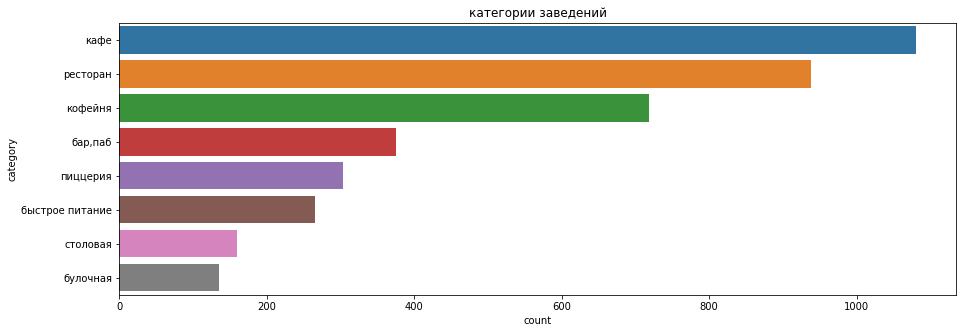

In [207]:
# средствами seaborn построим график для категориальных значений
plt.figure(figsize=(15,5))
ax = sns.barplot(x='count', y='category', data=place_category) \
    .set(title='категории заведений')

Самая популярная категория - **кафе** (28%). Далее - **ресторан** (24%), что очень странно, вероятно, для анализа попали не полные данные. Самое малочисленное заведение - **булочная**.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ⚠️ : </b> 
    
Данный проект сильно завязан на визуализации (так как ключевые моменты пойдут в презентацию для заказчика) стоит уделить особое внимание на оформление графиков.
    
Например зачем здесь цветовое разделение? Если цвет не несет дополнительной информации, то можно без проблем его убрать. В данном случае, у тебя категории заданы однозначно и разделять по цветам смысла нет

</div>

### Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы.

In [208]:
# методом describe посмотрим общую информацию по категориям заведений
data.groupby('category')['seats'].describe()

count        mean         std  min   25%   50%    75%     max
category                                                                      
бар,паб          231.0  123.632035  132.752397  0.0  46.0  80.0  148.5  1040.0
булочная          77.0  102.597403  104.696964  0.0  30.0  80.0  150.0   625.0
быстрое питание  157.0  102.025478  120.891027  0.0  30.0  60.0  140.0  1040.0
кафе             585.0   95.251282  108.851083  0.0  40.0  60.0  120.0  1040.0
кофейня          388.0  105.878866  117.978596  0.0  35.0  75.0  140.0  1040.0
пиццерия         218.0   97.995413  107.789627  0.0  30.0  55.0  123.0   625.0
ресторан         605.0  115.297521  102.428932  0.0  48.0  84.0  150.0   625.0
столовая          79.0   87.582278   94.970793  0.0  39.0  60.0   99.0   625.0

В каждой категории присутствуют заведения без посадочных мест.   
Для ресторанов это не нормально.

Семь категорий заведений имеют более 1000 посадочных мест. Забавно выглядит булочная на 625 мест и заведение быстрого питания на 1040 мест. У некоторых указано одинаковое значение 1288 мест. Совпадение? Ну думаю. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от от старшего ревьюера ✔️ : </b> 

Здорово, что отметил данные нюансы. Это хорошее качество для аналитика - понимать где аномалии в данных.
    

</div>

In [209]:
print('Заведения без посадочных мест =', len(data.query('seats == 0')))
print('Ресторанов без посадочных мест =', len(data.query('category == "ресторан" & seats == 0')))
print()
print('Заведений более 200 посадочных мест =', len(data.query('seats > 200')))
print('Заведений 500 и более посадочных мест =', len(data.query('seats >= 500')))

Заведения без посадочных мест = 52
Ресторанов без посадочных мест = 5

Заведений более 200 посадочных мест = 292
Заведений 500 и более посадочных мест = 48


Исключим из основного датафрейма рестораны без посадочных мест и заведения с числом мест более 500.

In [210]:
# число строк датафрейма до обработки
a1 = len(data)

In [211]:
# создадим копию столбца seats
data['seats_copy'] = data['seats']

# заполним пропуск нулями
data['seats_copy'] = data['seats_copy'].fillna(0)

# проверим, что пропуски пропали
data['seats_copy'].isna().sum()

0

In [212]:
# исключим заведения с числом мест более 500
data = data.query('seats_copy < 500')

# исключим строки по условию: 1 - ресторан, 2 - без посадочных мест
data.drop(data[(data.category == 'ресторан') & (data.seats == 0)].index, inplace=True)

# число строк датафрейма после обработки
a2 = len(data)

print('Удалено строк', a1-a2)

Удалено строк 53


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Исследуем количество посадочных мест в кафе

In [213]:
# посмотрим как распределены данные
data.query('category == "кафе"')['seats'].describe()

count    572.000000
mean      84.234266
std       78.565004
min        0.000000
25%       38.000000
50%       55.000000
75%      100.000000
max      481.000000
Name: seats, dtype: float64

Медианное значение - 60 мест.   
Минимально - ноль. Похоже на уличные кафе, работающие только на выдачу или со столиками для стоячих посетителей.    
Максимально - 495 мест. Заведение для проведения больших мероприятий или несколько залов у одного кафе.    

In [214]:
# рассмотрим перцентили
print(np.percentile(data.query('category == "кафе"')['seats_copy'], [95, 96, 97, 98, 99]))

[200.   226.   239.99 265.18 329.9 ]


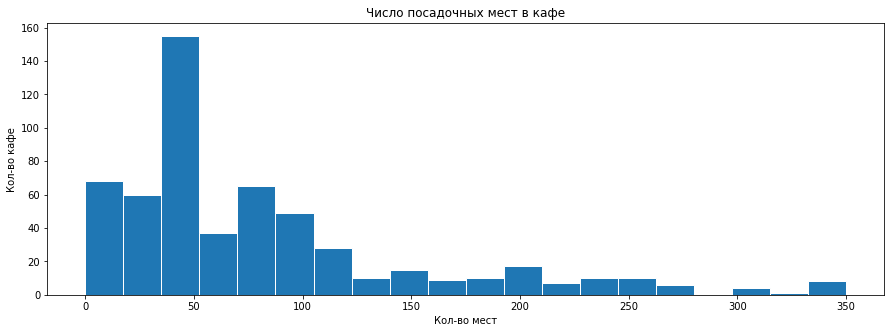

In [215]:
# Визуализируем данные
plt.figure(figsize=(15,5))
data.query('category == "кафе"')['seats'] \
    .hist(
        bins=20, 
        ec="white", 
        grid=False, 
        range=(0, 350)) \
    .set_title('Число посадочных мест в кафе')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во кафе')
plt.show()

####  Исследуем количество посадочных мест в ресторане

In [216]:
# посмотрим как распределены данные
data.query('category == "ресторан"')['seats'].describe()

count    588.000000
mean     107.363946
std       81.495248
min        2.000000
25%       48.000000
50%       83.000000
75%      150.000000
max      481.000000
Name: seats, dtype: float64

Медианное значение - 86 мест. Максимальное - 495.

In [217]:
# рассмотрим перцентили
print(np.percentile(data.query('category == "ресторан"')['seats_copy'], [95, 96, 97, 98, 99]))

[250. 273. 276. 300. 320.]


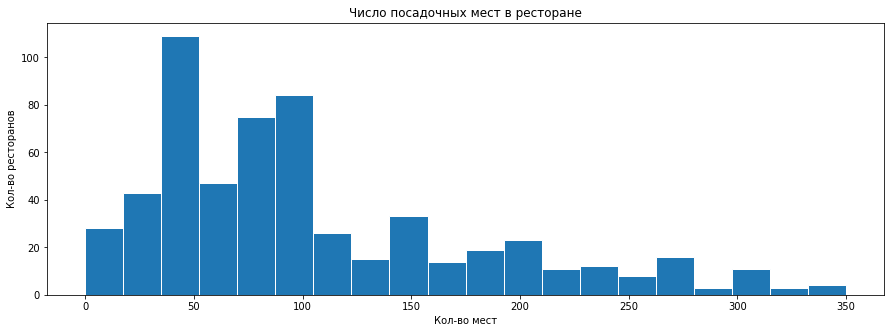

In [218]:
# Визуализируем данные
plt.figure(figsize=(15,5))
data.query('category == "ресторан"')['seats'] \
    .hist(
        bins=20, 
        ec="white", 
        grid=False, 
        range=(0, 350)) \
    .set_title('Число посадочных мест в ресторане')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во ресторанов')
plt.show()

#### Исследуем количество посадочных мест в кофейне

In [219]:
# посмотрим как распределены данные
data.query('category == "кофейня"')['seats'].describe()

count    377.000000
mean      90.625995
std       74.268422
min        0.000000
25%       34.000000
50%       70.000000
75%      130.000000
max      350.000000
Name: seats, dtype: float64

Медианное значение - 75 мест. Максимальное - 491

In [220]:
# рассмотрим перцентили
print(np.percentile(data.query('category == "кофейня"')['seats_copy'], [95, 96, 97, 98, 99]))

[200.   200.   227.9  251.72 279.72]


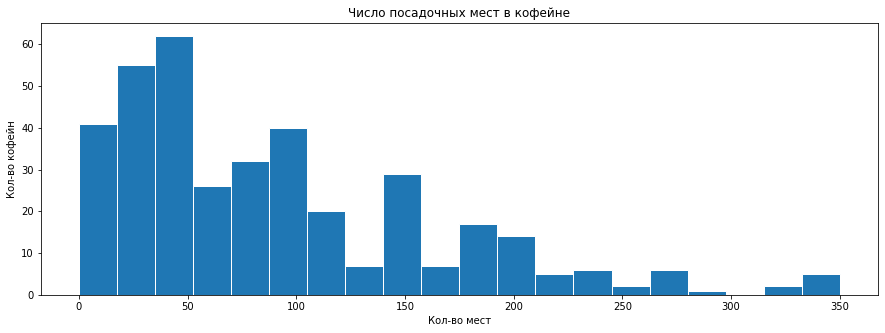

In [221]:
# Визуализируем данные
plt.figure(figsize=(15,5))
data.query('category == "кофейня"')['seats'] \
    .hist(
        bins=20, 
        ec="white", 
        grid=False, 
        range=(0, 350)) \
    .set_title('Число посадочных мест в кофейне')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во кофейн')
plt.show()

#### Исследуем количество посадочных мест в бар,пабе

In [222]:
# посмотрим как распределены данные
data.query('category == "бар,паб"')['seats'].describe()

count    226.000000
mean     110.393805
std       96.514316
min        0.000000
25%       45.250000
50%       80.000000
75%      140.000000
max      480.000000
Name: seats, dtype: float64

Медианное значение - 80 мест. Максимальное - 480

In [223]:
# рассмотрим перцентили
print(np.percentile(data.query('category == "бар,паб"')['seats_copy'], [95, 96, 97, 98, 99]))

[276. 300. 319. 356. 406.]


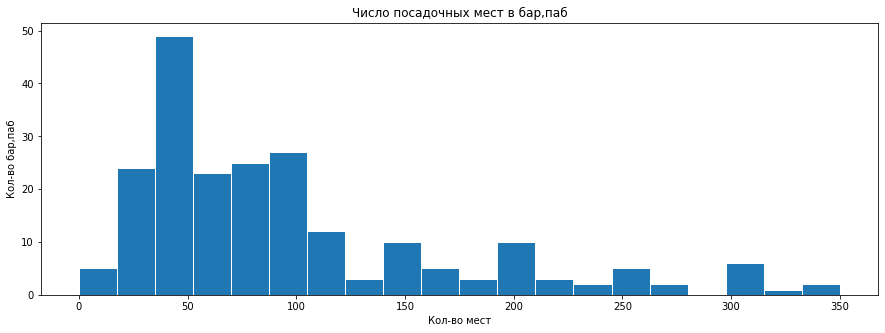

In [224]:
# Визуализируем данные
plt.figure(figsize=(15,5))
data.query('category == "бар,паб"')['seats'] \
    .hist(
        bins=20, 
        ec="white", 
        grid=False, 
        range=(0, 350)) \
    .set_title('Число посадочных мест в бар,паб')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во бар,паб')
plt.show()

####  Исследуем количество посадочных мест в пиццерии

In [225]:
# посмотрим как распределены данные
data.query('category == "пиццерия"')['seats'].describe()

count    215.000000
mean      90.641860
std       88.508129
min        0.000000
25%       30.000000
50%       52.000000
75%      120.000000
max      400.000000
Name: seats, dtype: float64

Медианное число посадочных мест меньшем, чем у остальных - 52 места. Максимальное - 455

In [226]:
# рассмотрим перцентили
print(np.percentile(data.query('category == "пиццерия"')['seats_copy'], [95, 96, 97, 98, 99]))

[273. 273. 300. 300. 350.]


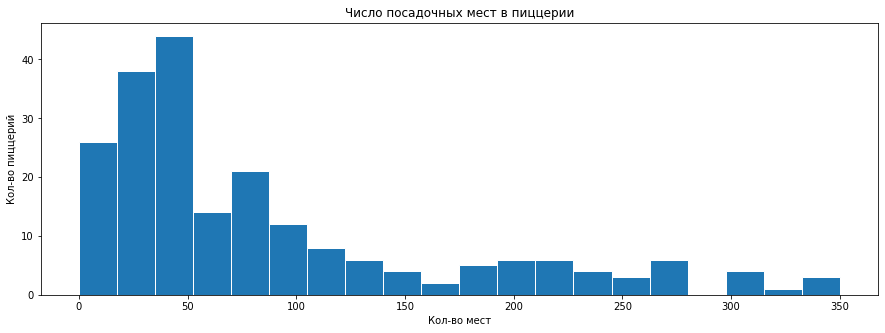

In [227]:
# Визуализируем данные
plt.figure(figsize=(15,5))
data.query('category == "пиццерия"')['seats'] \
    .hist(
        bins=20, 
        ec="white", 
        grid=False, 
        range=(0, 350)) \
    .set_title('Число посадочных мест в пиццерии')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во пиццерий')
plt.show()

####  Исследуем количество посадочных мест в быстром питании

In [228]:
# посмотрим как распределены данные
data.query('category == "быстрое питание"')['seats'].describe()

count    155.000000
mean      93.406452
std       89.376970
min        0.000000
25%       30.000000
50%       55.000000
75%      130.000000
max      350.000000
Name: seats, dtype: float64

Медианное число - 65 мест. Максимальное - 450

In [229]:
# рассмотрим перцентили
print(np.percentile(data.query('category == "быстрое питание"')['seats_copy'], [95, 96, 97, 98, 99]))

[269.55 273.   273.33 276.   331.1 ]


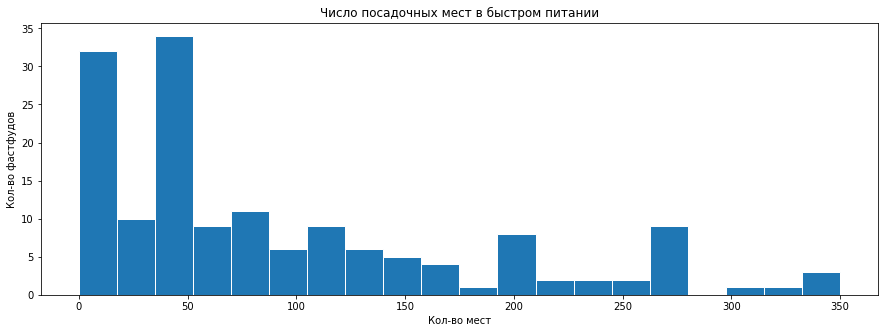

In [230]:
# Визуализируем данные
plt.figure(figsize=(15,5))
data.query('category == "быстрое питание"')['seats'] \
    .hist(
        bins=20, 
        ec="white", 
        grid=False, 
        range=(0, 350)) \
    .set_title('Число посадочных мест в быстром питании')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во фастфудов')
plt.show()

#### Исследуем количество посадочных мест в столовых

In [231]:
# посмотрим как распределены данные
data.query('category == "столовая"')['seats'].describe()

count     78.000000
mean      80.692308
std       73.059006
min        0.000000
25%       38.500000
50%       60.000000
75%       97.500000
max      350.000000
Name: seats, dtype: float64

Медианное число - 75 мест. Максимальное - 428

In [232]:
# рассмотрим перцентили
print(np.percentile(data.query('category == "быстрое питание"')['seats_copy'], [95, 96, 97, 98, 99]))

[269.55 273.   273.33 276.   331.1 ]


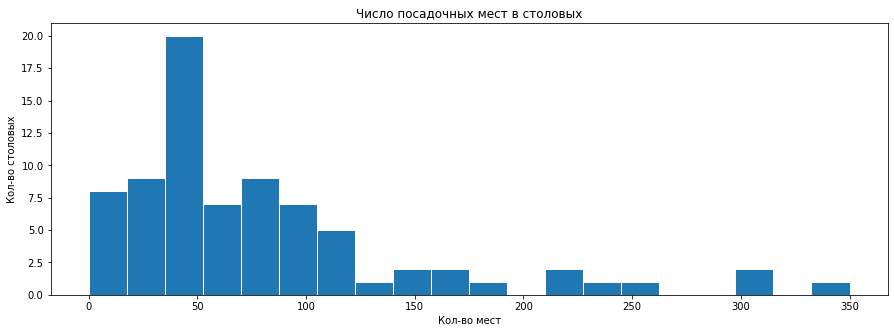

In [233]:
# Визуализируем данные
plt.figure(figsize=(15,5))
data.query('category == "столовая"')['seats'] \
    .hist(
        bins=20, 
        ec="white", 
        grid=False, 
        range=(0, 350)) \
    .set_title('Число посадочных мест в столовых')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во столовых')
plt.show()

#### Исследуем количество посадочных мест в булочных

In [234]:
# посмотрим как распределены данные
data.query('category == "булочная"')['seats'].describe()

count     76.000000
mean      95.723684
std       86.145241
min        0.000000
25%       30.000000
50%       76.000000
75%      142.500000
max      320.000000
Name: seats, dtype: float64

Медианное число - 50 мест. Максимальное - 478, крутая булочная.

In [235]:
# рассмотрим перцентили
print(np.percentile(data.query('category == "булочная"')['seats_copy'], [95, 96, 97, 98, 99]))

[249.9  273.   275.94 283.68 300.  ]


Странно, но 478 это не единственный выброс. Существуют булочные боле 250 мест.

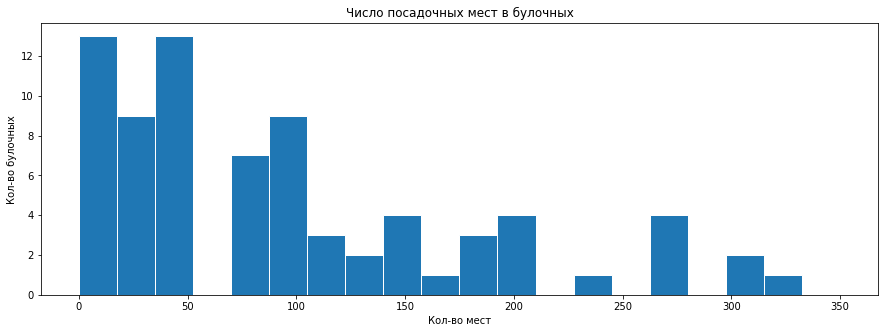

In [236]:
# Визуализируем данные
plt.figure(figsize=(15,5))
data.query('category == "булочная"')['seats'] \
    .hist(
        bins=20, 
        ec="white", 
        grid=False, 
        range=(0, 350)) \
    .set_title('Число посадочных мест в булочных')
plt.xlabel('Кол-во мест')
plt.ylabel('Кол-во булочных')
plt.show()

С булочными самый неоднозначный график. Т.е. нет нормального распределения данных.

#### Исследуем количество посадочных мест во всех категориях заведений

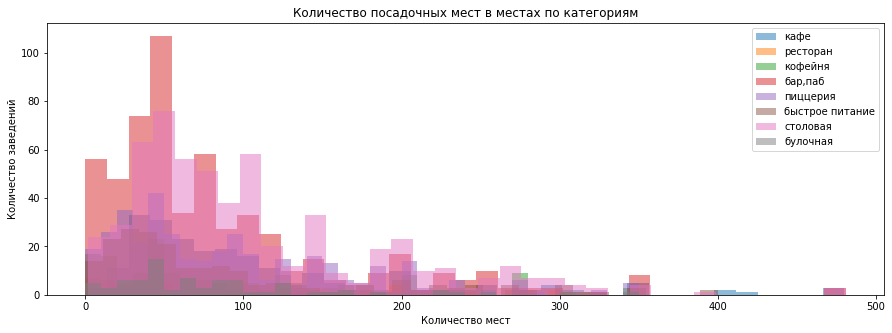

In [237]:
# создадим список категорий
cat = data.category.value_counts().index

# построим распределение посадочных мест по категориям
plt.figure(figsize=(15,5))
data.groupby('category')['seats'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(cat) # передадим список категорий в легенду
plt.title('Количество посадочных мест в местах по категориям')
plt.xlabel('Количество мест')
plt.ylabel('Количество заведений')
plt.show()

График смещён влево, имеет длинный хвост вправо. Медианное значение среди разных категорий заведений примерно одинаковое.    

Слишком много заведений без посадочных мест. Или данные отсутствовали и установлена заглушка - ноль или аренда помещений в Москве такая дорогая, что мы рассматриваем тесные заведения без посадочных мест.

Динный хвост диаграммы справа нормальное явление. Однако, после того как отсекли анамально большие значения, всё равно остались заведения с числом мест более 300.

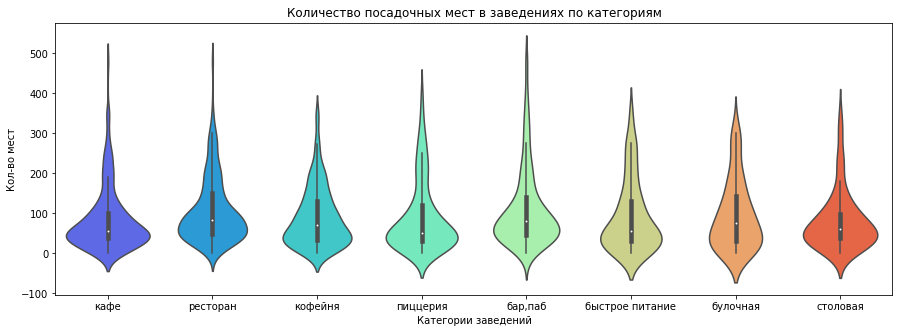

In [238]:
# с помощью seaborn построим график распределения
plt.figure(figsize=(15,5))
sns.violinplot(x='category', y='seats', data=data, palette='rainbow') 
plt.title('Количество посадочных мест в заведениях по категориям')
plt.xlabel('Категории заведений')
plt.ylabel('Кол-во мест')
plt.show()

Разноцветный график характеризующий форму распределения, демонстрирует схожее распределение посадочных мест во всех категориях заведений.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



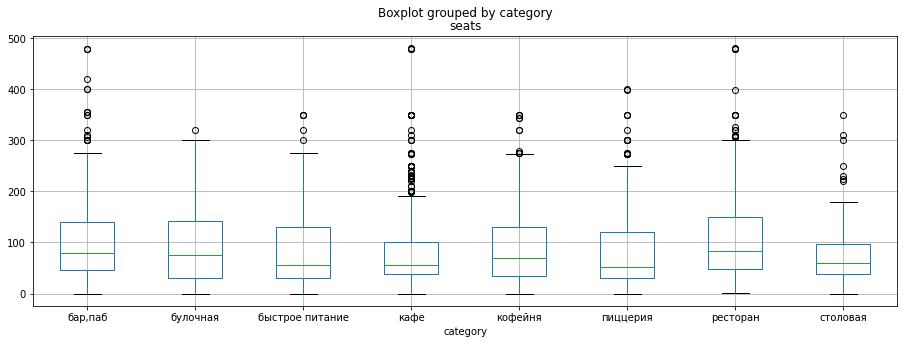

In [239]:
# построим ящик с усами.
data.boxplot('seats', by='category', figsize=(15, 5));

Альтернативная визуализация одинаковых данных.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от от старшего ревьюера ❌ : </b>
    
Отличный разбор, ты подробно рассмотрел распределения. Но к сожалению, нет сортировки boxplot + подписи графиков то на русском, то на английском, нет подписи по оси y в boxplot.
    
Почему такой акцент на сортировке? Нередко, в реальной практике, заказчик просто даже не посмотрит на неотсортированные графики и тебе придется переделывать. Лучше сразу приучить себя выполнять сортировку на графиках по умолчанию
    
    
Далее не буду акцентировать внимание на этом, но многие графики у тебя требуют данной корректировки

</div>

### Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?

Ранне создавалась переменная `chain`. Выведем её значение, добавив долю от общего числа.

In [240]:
chain['%'] = (chain['count'] * 100 / len(data)).round(2)
chain

name  count       type      %
0     0   2685  несетевое  68.37
1     1   1295    сетевое  32.98

In [241]:
# для визуализации соотношения сетевых и несетевых заведений создадим переменную
chain_2 = pd.DataFrame(
        data.groupby(['category', 'chain'])['name']
        .count()) \
            .reset_index() \
            .rename(columns={'name': 'number'})

# нулям и еденицам зададим текстовые значения статуса
chain_2.loc[chain_2['chain'] == 0, 'chain'] = 'несетевое'
chain_2.loc[chain_2['chain'] == 1, 'chain'] = 'сетевое'

chain_2

category      chain  number
0           бар,паб  несетевое     309
1           бар,паб    сетевое      62
2          булочная  несетевое      52
3          булочная    сетевое      83
4   быстрое питание  несетевое     180
5   быстрое питание    сетевое      84
6              кафе  несетевое     778
7              кафе    сетевое     290
8           кофейня  несетевое     368
9           кофейня    сетевое     340
10         пиццерия  несетевое     157
11         пиццерия    сетевое     144
12         ресторан  несетевое     679
13         ресторан    сетевое     242
14         столовая  несетевое     127
15         столовая    сетевое      32

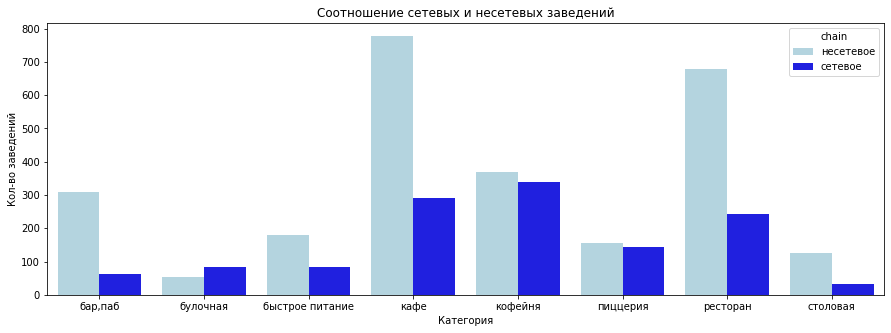

In [242]:
# построим столбчатую диаграмму в разрезе сетевых и несетевых заведений
plt.figure(figsize=(15,5))
ax = sns.barplot(x='category',
            y='number',
            hue="chain",
            data=chain_2,
            palette=['lightblue', 'blue'])

ax.set_title('Соотношение сетевых и несетевых заведений')
ax.set(xlabel='Категория', ylabel='Кол-во заведений');

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> В наименования внесены изменения.</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> ⬆ Комментарии от старшего ревьюера ✔️ : </b> 

Совершенно верно. Так как отчет исследовательский идет стороннему лицу, он не обязан вникать как представлены те или иные данные. Следовательно, надо стараться строить графики максимально наглядными и читаемыми
   
</div>

### Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.

Ранее мы получили, что доля несетевых заведений - 63% от общего числа.   
- Бары/пабы, заведения быстрого питания, кафе, рестораны и столовые преимущественно несетевые.    
- Большинство булочных - сетевые.    
- Кофейни и пиццерии имеют одинаковые пропорции.

### Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся? Отобразите общее количество заведений и количество заведений каждой категории по районам.

In [243]:
place_name_2 = pd.DataFrame(
                    data.query('chain == 1')
                    .groupby(['name', 'category', 'district'])['address']
                    .count()
                    .reset_index()
                    .rename(columns={'address': 'number'})                      
                    ).sort_values(by='number', ascending=False) \
                    .head(15)

In [244]:
# строим гистограммы по заведениям
fig = px.histogram(place_name_2, # загружаем данные
                   x='name', # указываем столбец с данными для оси X   
                   y='number', # указываем столбец с данными для оси y   
                   title='Распределение популярных сетевых заведений', # указываем заголовок                  
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Наименование заведения') # подпись для оси X
fig.update_yaxes(title_text='Кол-во заведений') # подпись для оси Y
fig.show() # выводим график

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ❌ : </b>
    
Здесь выведены не все топ-15 сетей, а только 9

</div>

Самыми популярными оказались федеральные сети, в т.ч. представленные в других регионах. Лидером является шоколадница.

In [245]:
# строим гистограммы по категориям
fig = px.histogram(place_name_2, # загружаем данные
                   x='category', # указываем столбец с данными для оси X  
                   y='number', # указываем столбец с данными для оси Y  
                   title='Распределение популярных сетевых заведений по категориям', # указываем заголовок                  
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Категория сетевых заведений') # подпись для оси X
fig.update_yaxes(title_text='Кол-во заведений') # подпись для оси Y
fig.show() # выводим график

Самая популярная категория - кофейня.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ❌ : </b>
    
Во многих случаях, асболютные значения не всегда информативны. В большинстве случаев когда речь идет о распределении, то надо рассчитать **долю** (относительные величины)

</div>

In [246]:
# строим гистограммы по районам
fig = px.histogram(place_name_2, # загружаем данные
                   x='number', # указываем столбец с данными для оси X   
                   y='district', # указываем столбец с данными для оси y   
                   title='Распределение популярных сетевых заведений по районам', # указываем заголовок                  
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Кол-во заведений') # подпись для оси X
fig.update_yaxes(title_text='Наименование района') # подпись для оси Y
fig.show() # выводим график

Большинство заведений расположено в Центральном административном округе.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆  Комментарии от старшего ревьюера  ❌ : </b>
    
По условию задачи, требовалось на одном графике отобразить общее количество популярных сетевых заведений по каждой категории в разрезе районов (аналогично как ты реализовал следующий график ниже)

</div>

### Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [247]:
# выведем перечень районов в алфавитном порядке
data.district.sort_values().unique()

array(['Восточный административный округ',
       'Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Центральный административный округ'], dtype=object)

In [248]:
# создадим таблицу с административными районами для последующей визуализации
district = pd.DataFrame(
    data.groupby(['district', 'category'])['address']
    .count()) \
        .reset_index() \
        .rename(columns={'address': 'number'})

In [249]:
# строим гистограмму
fig = px.bar(district, # загружаем данные
             x='district', # указываем столбец с данными для оси X
             y='number', # указываем столбец с данными для оси Y
             color='category', # обозначаем категорию для разделения цветом
             title='Административные районы Москвы', # указываем заголовок  
             labels=dict(number="Кол-во заведений", district="Район"), # подпись для оси X и Y
             width=950, # размер по ширине
             height=600 # размер по высоте
             )
fig.update_xaxes(tickangle=15) # задаём угол наклона текста
fig.show() # выводим график

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆  Комментарии от старшего ревьюера  ❌ : </b>
    
В таких случаях тоже делают сортировки по общему количеству заведений в разрезе районов. В идеале еще бы отобразить помимо количественных значений, еще и проценты по категориям. 
    
![image.png](attachment:image.png)
    
Еще хорошим ходом в некоторых случаях (когда длинные текстовые наименования) является поменять местами оси x и y, как  в примере выше (данный график как раз по топ-15 сетям)

</div>

Центральный административный округ имеет наибольшее число заведений.    
Меньше всего заведений находится в Северо-Западном административном округе.

### Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

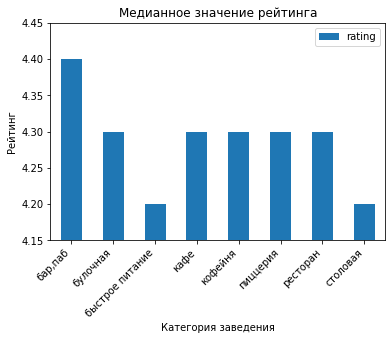

In [250]:
# построим гистограмму для медианы рейтинга
data.pivot_table(
    index = 'category', 
    values = 'rating', 
    aggfunc = 'median') \
        .plot.bar(y='rating') \
        .set_ylim(4.15, 4.45)
plt.title('Медианное значение рейтинга')
plt.xlabel('Категория заведения')
plt.ylabel('Рейтинг')
plt.xticks(rotation=45, ha='right')
plt.show()

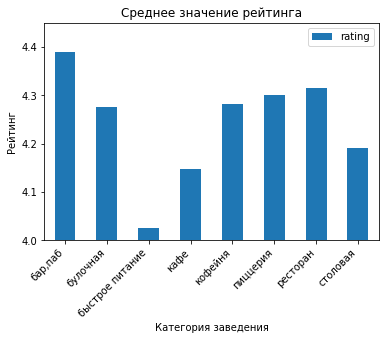

In [251]:
# построим гистограмму для среднего рейтинга
data.pivot_table(
    index = 'category', 
    values = 'rating', 
    aggfunc = 'mean') \
        .plot.bar(y='rating') \
        .set_ylim(4, 4.45)
plt.title('Среднее значение рейтинга')
plt.xlabel('Категория заведения')
plt.ylabel('Рейтинг')
plt.xticks(rotation=45, ha='right')
plt.show()

По пятибальной шкале медианное и средннее значение рейтинга находится в диапазоне от 4.1 до 4.4 балла. 

Низкий рейтинг у быстрого питания и кафе. Лучший показатель у баров и пабов.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> ⬆ Комментарии от старшего ревьюера ⚠️ : </b> 
    
В данном случае было бы информативнее построить boxplot, раз уж идет речь о распределении + в случаях когда у нас есть какие то фиксированные значения (от 1 до 5), то смысла брать медиану нет, т.к. нет выбросов

</div>

### Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле `admin_level_geomap.geojson`.

Для каждого округа посчитаем медианный рейтинг заведений питания, которые находятся на его территории:

In [252]:
rating_df = data.groupby('district', as_index=False)['rating'].agg('median')
rating_df

district  rating
0         Восточный административный округ     4.3
1          Западный административный округ     4.3
2          Северный административный округ     4.3
3  Северо-Восточный административный округ     4.2
4   Северо-Западный административный округ     4.3
5       Центральный административный округ     4.4

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ❌ : </b>
    
Вот как раз в этом случае, медиану брать не стоит

</div>

In [253]:
geo = '/content/ya_data/admin_level_geomap.geojson'

In [254]:
# загружаем JSON-файл с границами округов Москвы
state_geo = geo
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.3,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

Наибольший рейтинг получают заведения в центральном округе.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Проверил, цвет не меняет.</div>

### Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки `folium`

In [255]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Код брал из учебного материала спринта - <b>Фоновая картограмма<b>.</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента V2:</b> С картой работал локально. На моей машине, при заливке  не работает градация цвета, т.е. всё округа заливаюся одинаково. Предложенный вариант  - `folium.LayerControl().add_to(m)` не дал результат.

Вот локальная тетрадка (не работает)
https://drive.google.com/file/d/1fh8YYIR2EldCtkCieL7K6khbCoV2zo2U/view?usp=sharing
    
Через Colab - работает
https://colab.research.google.com/drive/1gvhmOt_95mYgs-0Q1LEbKq8VVUND6M94?usp=sharing    
    
    
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> ⬆ Комментарии от старшего ревьюера ⚠️ : </b> 

Здесь мне к сожалению сложно отследить в чем была проблема изначально и очень жаль, что ревьюер проигнорировал твои вопросы
   
</div>

### Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [256]:
# создадим переменную топ-15 улиц по количеству заведений
street_places = data.groupby('street')['name'] \
    .count() \
    .reset_index() \
    .rename(columns={'name': 'amount_place'}) \
    .sort_values(by='amount_place', ascending=False) \
    .head(15)

# создадим переменную с кол-вом категорий заведений на каждой улице
street_categories = data.groupby('street') \
    .agg({'category': 'nunique'}) \
    .reset_index() \
    .rename(columns={'category': 'number_of_categories'})

# объеденим данные
street = street_places.merge(street_categories)
street

street  amount_place  number_of_categories
0             проспект мира           182                     8
1         дмитровское шоссе            87                     8
2    ленинградский проспект            71                     8
3       ленинградское шоссе            69                     8
4        алтуфьевское шоссе            47                     8
5     новодмитровская улица            40                     7
6      кутузовский проспект            39                     8
7           ярцевская улица            38                     7
8        измайловское шоссе            37                     5
9      новослободская улица            36                     8
10         щёлковское шоссе            35                     7
11      волоколамское шоссе            34                     8
12    кронштадтский бульвар            34                     7
13  краснобогатырская улица            33                     7
14            улица барклая            29                     6

In [257]:
# строим гистограммы по категориям
fig = px.histogram(street, # загружаем данные
                   x='street', # указываем столбец с данными для оси X  
                   y='amount_place', # указываем столбец с данными для оси Y  
                   title='Топ-15 улиц по количеству заведений', # указываем заголовок                  
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Улица') # подпись для оси X
fig.update_yaxes(title_text='Кол-во заведений') # подпись для оси Y
fig.show() # выводим график

Возглавляет топ-15 улиц по количеству заведений проспект Мира - 184 заведения.

In [258]:
# строим гистограммы по категориям
fig = px.histogram(street, # загружаем данные
                   x='street', # указываем столбец с данными для оси X  
                   y='number_of_categories', # указываем столбец с данными для оси Y  
                   title='Топ-15 улиц по количеству заведений', # указываем заголовок                  
                   barmode='overlay') # выбираем «полупрозрачный» тип отображения столбцов
fig.update_xaxes(title_text='Улица') # подпись для оси X
fig.update_yaxes(title_text='Кол-во заведений') # подпись для оси Y
fig.show() # выводим график

В основном датафрейме представлено 8 категорий заведений общепита. На популярных улицах представленны почти все категории заведений

Отобразим это на одном графике.    

In [259]:
# Создадим список с названиями улиц из топ-15
street_list = list(street.street)
street_list

['проспект мира',
 'дмитровское шоссе',
 'ленинградский проспект',
 'ленинградское шоссе',
 'алтуфьевское шоссе',
 'новодмитровская улица',
 'кутузовский проспект',
 'ярцевская улица',
 'измайловское шоссе',
 'новослободская улица',
 'щёлковское шоссе',
 'волоколамское шоссе',
 'кронштадтский бульвар',
 'краснобогатырская улица',
 'улица барклая']

In [260]:
# создадим переменную с группировкой по улицам для последующей визуализации
street_2 = data.groupby(['street', 'category'])['address'] \
            .count() \
            .reset_index() \
            .rename(columns={'address': 'number'}) \
            .sort_values(by='number', ascending=False)

# оставим в переменной улицы из списка топ-15
street_2 = street_2.query('street in @street_list')
street_2

street         category  number
1034          проспект мира             кафе      53
1037          проспект мира         ресторан      43
1035          проспект мира          кофейня      36
679     ленинградское шоссе         ресторан      25
467       дмитровское шоссе         ресторан      24
...                     ...              ...     ...
846    новослободская улица         столовая       1
844    новослободская улица         пиццерия       1
841    новослободская улица  быстрое питание       1
840    новослободская улица         булочная       1
823   новодмитровская улица         столовая       1

[110 rows x 3 columns]

In [261]:
# строим гистограмму
fig = px.bar(street_2, # загружаем данные
             x='street', # указываем столбец с данными для оси X
             y='number', # указываем столбец с данными для оси Y
             color='category', # обозначаем категорию для разделения цветом
             title='топ-15 улиц Москвы', # указываем заголовок  
             labels=dict(number="Кол-во заведений", street="Улица"), # подпись для оси X и Y
             width=950, # размер по ширине
             height=600 # размер по высоте
             )
fig.update_xaxes(tickangle=25) # задаём угол наклона текста
fig.show() # выводим график

### Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

In [262]:
# найдём улицы с одним объектом общепита
single_place = data.groupby('street')['name'].count().reset_index().rename(columns={'name': 'number'}).query('number == 1')

# добавим полные сведения из основного датафрейма
single_place = single_place.merge(data, on=['street'])

print('Кол-во улиц с одним объектом общепита =', len(single_place))

Кол-во улиц с одним объектом общепита = 265


In [263]:
# посмотрим, как распределены заведения по категориям
single_place.category.value_counts()

кафе               82
ресторан           55
кофейня            46
бар,паб            30
столовая           25
пиццерия           11
быстрое питание    11
булочная            5
Name: category, dtype: int64

Какая бы мрачная улочка не была, но кафе должно быть.

In [264]:
# посмотрим, как распределены заведения по округам
single_place.district.value_counts()

Центральный административный округ         83
Северо-Восточный административный округ    49
Северный административный округ            47
Восточный административный округ           45
Западный административный округ            23
Северо-Западный административный округ     18
Name: district, dtype: int64

В Центральном административном округе больше всего улиц с одним заведением.    
Очередной раз напрашивается вывод, что получены не полные данные.

In [265]:
# посмотрим, как распределены заведения по округам
single_place.chain.value_counts()

0    200
1     65
Name: chain, dtype: int64

Несетевых заведений изначально было больше. Вероятно, маркетологи сетевых заведений не хотят размещать свои объекты на не популярныхх улицах.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆  Комментарии от старшего ревьюера ❌ : </b>
    
Здесь требуется посмотреть сколько таких улиц и провести любое исследование (что ты с успехом и сделал), в разрезе любых признаков на выбор.

Главное, чтобы исследование и визуализация его результатов была в наличии
    
Но ревьюер не акцентировал внимание на визуализации

</div>

### Значения средних чеков заведений хранятся в столбце `middle_avg_bill`. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

In [266]:
# изучим данные
data.middle_avg_bill.describe()

count     1494.000000
mean       985.825971
std        885.282486
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      11000.000000
Name: middle_avg_bill, dtype: float64

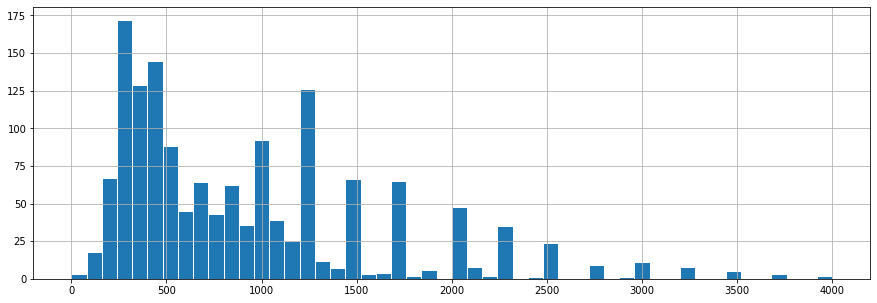

In [267]:
# построим гистограмму
plt.figure(figsize=(15,5))
data.middle_avg_bill.hist(bins=50, ec="white", range=(0, 4000));

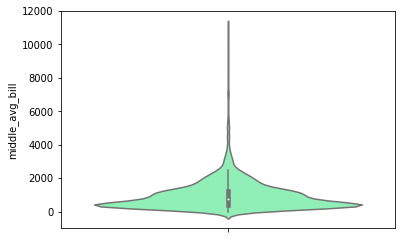

In [268]:
# построим распределение
sns.violinplot(y='middle_avg_bill', data=data, palette='rainbow');

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆  Комментарии от старшего ревьюера ❌ : </b>
    
Здесь ты видимо поторопился и графики не оформил в должном объеме. Нет ни заголовков и осей

</div>

In [269]:
avg_bill = data.groupby('district', as_index=False)['middle_avg_bill'].median().sort_values(by='middle_avg_bill')
avg_bill

district  middle_avg_bill
3  Северо-Восточный административный округ            500.0
0         Восточный административный округ            575.0
2          Северный административный округ            650.0
4   Северо-Западный административный округ            700.0
1          Западный административный округ           1025.0
5       Центральный административный округ           1137.5

Центральный и Западный административный округ имеют самый высокий средний чек.

Дешевые заведения расположены в Юго-Восточном административном округе.

In [270]:
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=avg_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlOrBr',
    fill_opacity=0.3,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

# выводим карту
m

Округа с высоким средним чеком: Центральный, Западное и Юго-Западное направление.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> ⬆ Комментарии от старшего ревьюера ⚠️ : </b> 

На данной итерации с Choropleth у тебя никаких проблем не вижу. Всё корректно
    
Единственное, легенда к графику ошибочная. Здесь речь про средний чек, а у тебя рейтинг заведений
   
</div>

### Необязательное задание: проиллюстрируйте другие взаимосвязи, которые вы нашли в данных. Например, по желанию исследуйте часы работы заведений и их зависимость от расположения и категории заведения. Также можно исследовать особенности заведений с плохими рейтингами, средние чеки в таких местах и распределение по категориям заведений.

Однажды сделаю.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от старшего ревьюера ✔️ : </b> 

Здесь по желанию конечно. Проект и так объемный)
   
</div>

### Соберите наблюдения по вопросам выше в один общий вывод.

В нашем распоряжении 8 категорий заведений. Самое популярное - кафе. Реже встречается - булочная.    
Среднее число место - 60.

63% заведений являются несетевыми. С небольшим отрывом число сетевых заведений превышает несетевые в категории кофейни и пиццерии. 

Федеральные сети - самые популярные сетевые заведения. Большинство победителей данной номинации собрались в категории кофейни и расположены в Центральном административном округе. Лидером является шоколадница.

Заведения с высоким рейтингом посетителей из категории бары / пабы.

После нанесения точек на карту, обнаружено, что наименьшая плотность заведений в юго-восточной части Москвы.

Самым перегруженным по количеству общепита является проспект Мира, а также есть более 400 улиц с одним заведением общественного питания.

Рассмотрев средний чек сделаны выводы:
- Центральный и Западный административный округ имеют самый высокий средний чек.
- Дешевые заведения расположены в Юго-Восточном административном округе.


<hr style="border: 2px solid green;" />

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от старшего ревьюера ✔️ : </b> 

Выводы логичны и корректны. Основываются на твоих расчетах и результатах анализа
   
</div>

## Детализируем исследование: открытие кофейни

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Попробуйте определить, осуществима ли мечта клиентов.

### Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?

In [271]:
print('Количество кофеен =', len(data.query('category =="кофейня"')))

Количество кофеен = 708


In [272]:
fig = px.bar(
    (
       data.query('category =="кофейня"')
        .groupby('district')['name']
        .count()
        .reset_index()
        .rename(columns={'name': 'amount'})
        .sort_values(by='amount') 
    ),
    x='amount', y='district', title='Кол-во кофеен')

fig.show() 

Центральный округ безусловный лидер по числу кофеен. Это не удивительно, спрос есть. Большая проходимасть + много офисов и все пьют кофе.

### Есть ли круглосуточные кофейни?

In [273]:
print('Количество круглосуточных кофеен =', len(data.query('category == "кофейня" & is_24_7 == True')))

Количество круглосуточных кофеен = 27


In [274]:
# отразим отношение круглосуточных кафе
fig = px.bar(
    (
    data
        .query('category == "кофейня"')
        .groupby(['district', 'is_24_7'])['address']
        .count()
        .reset_index()
        .sort_values(by='address')    
    ), x='address', y='district', color='is_24_7', title='Доля круглосуточных кофеен по округам')
fig.update_xaxes(tickangle=45)
fig.show() 

Доля круглосуточных кофеен мала. В основном они представлены в центральном округе.

### Какие у кофеен рейтинги? Как они распределяются по районам?

Можно создать отображение рейтинга на хороплете, но проблема с градацией цвета не решена.    
Выведем таблицу.

In [275]:
data.query('category =="кофейня"').groupby('district')['rating'].median()

district
Восточный административный округ           4.3
Западный административный округ            4.3
Северный административный округ            4.3
Северо-Восточный административный округ    4.3
Северо-Западный административный округ     4.3
Центральный административный округ         4.3
Name: rating, dtype: float64

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ❌ : </b>
    
Здесь аналогично, медиана не совсем уместно + информативнее было построить boxplot

</div>

Кофе везде варят одинаково хорошо.

### На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [276]:
data.middle_coffee_cup.describe()

count     275.000000
mean      174.145455
std       106.585427
min        60.000000
25%       122.000000
50%       165.000000
75%       220.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

Минимальное, среднее, медианное значение и 3-й квартиль вопросов не вызывают.   
Странно выглядит максимальное значение - 1568 руб.

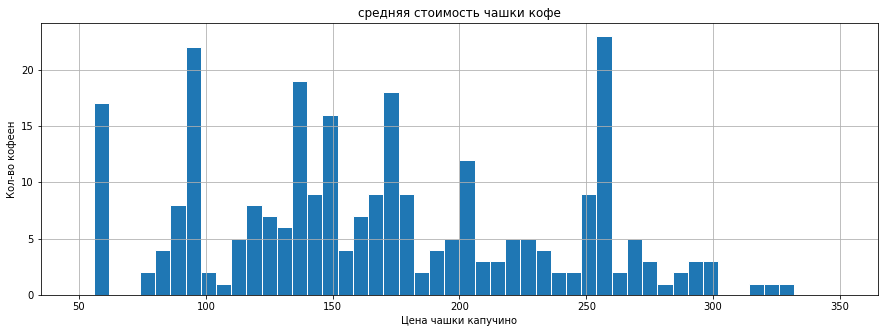

In [277]:
# построим гистограмму
plt.figure(figsize=(15, 5))
data.middle_coffee_cup.hist(
    bins=50,
    ec="white", 
    range=(50, 350)) \
    .set_title('средняя стоимость чашки кофе')
plt.xlabel('Цена чашки капучино')
plt.ylabel('Кол-во кофеен')
plt.show();

Распределением Гаусса эту диаграмму не назвать.

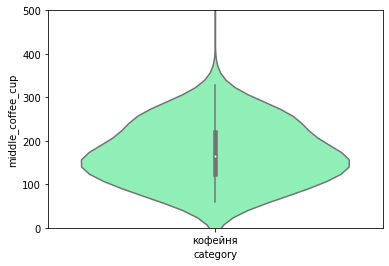

In [278]:
# построим распределение
sns.violinplot(x='category', y='middle_coffee_cup', data=data.query('category =="кофейня"'), palette='rainbow').set_ylim(0,500);

Средняя цена 150 руб. Свыше 400 руб. - выбросы.

Сгруппируем точки кофеен на карте
![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)


Почему-то в выделенном участке мало кофеен. Вероятно, открыть стоит там.
![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5-2.png)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> ⬆ Комментарии от старшего ревьюера ⚠️ : </b> 

Здесь можно было провести более глубокое исследование, например зависимость средней чашки кофе от рейтинга заведения или расположения
   
</div>

### Рекомендация

Открывать кофейню лучше в Центральном округе. Конкуренция большая, но и спрос большой.    
Число посадочных мест до 50. Среднею цену за чашку капучино установить в диапазоне от 150 до 200 руб.

<hr style="border: 2px solid green;" />

## Презентация

https://github.com/vs-gorgan/practicum.yandex/blob/main/11_Moscow_places/moscow_places.pdf

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> В прошлый раз забыл сохранить проект после добавления ссылки. Теперь все на месте</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " ><b> 
⬆ Комментарии от старшего ревьюера ❌ : </b>
    
Хорошая по структуре презентация, но не хватает некоторых ключевых моментов:
    
- нет целей и задач исследования
    
- не все ключевые результаты исследования представлены
    
- нет результатов по кофейням
    
- нет выводов и рекомендаций
    
Такую презентацию конечно нельзя было принимать

</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента V2:</b> Исправился</div>

----

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от старшего ревьюера ⚠️ : </b>

Итог ревью - в целом, была проделана хорошая и объемная работа. Ты строго следовал структуре проекта. Подготовил данные к исследовательскому анализу и успешно выполнил большую часть задач. Сформировал соответствующие выводы и рекомендации.
    
Но есть критические ошибки в плане визуализации результатов и некоторые нюансы, которые упустил из виду.
    
Я отметил по ходу проекта на те моменты, которые стоило доработать. Посмотри, пожалуйста.
    
---
    
Еще раз спасибо за фидбек, это позволяет делать работу лучше и следить за качеством выполняемых работ. Очень жаль, что произошла такая ситуация с тобой и ты не получил должной обратной связи.
    
Успехов на следующих проектах! Видно, что ты стараешься погрузиться в проект полностью)
    
![](https://media.giphy.com/media/xUKrrEnN9I5lnrcSMv/giphy-downsized-large.gif)

</div>

---